# Lorenz Equation

The Lorenz equations are a set of three coupled, nonlinear differential equations originally introduced by Edward Lorenz in 1963 to model atmospheric convection. They are widely known for their chaotic solutions and are often used as an example of deterministic chaos in dynamical systems.

#### The Differential Equations are as follows

$$
\begin{aligned}
    \frac{dx}{dt} & = \sigma (y - x) \\
    \frac{dy}{dt} & = x(\rho - z) - y \\
    \frac{dz}{dt} & = xy - \beta x
\end{aligned}
$$

Where:

- $x, y, z$ are the system variables (e.g., representing convection, temperature, etc.).
- $\sigma$ (sigma) is the Prandtl number, related to the fluid's viscosity.
- $\rho$ (rho) is the Rayleigh number, related to the temperature difference driving convection.
- $\beta$ (beta) is a geometric factor.

These equations exhibit chaotic behavior for certain parameter values, meaning that small changes in initial conditions can lead to vastly different outcomes over time. This sensitivity is often referred to as the "butterfly effect.

In [1]:
import numpy as np
from scipy.integrate import odeint , odepack

In [2]:
def lorenz(state, t, sigma, rho, beta):
    """
    The Lorenz equations.

    Parameters:
    state : array-like
        Contains the current values of x, y, z
    t : float
        Current time (not used in autonomous system)
    sigma, rho, beta : float
        System parameters

    Returns:
    list
        Derivatives [dx/dt, dy/dt, dz/dt]
    """
    x, y, z = state

    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z

    return [dx_dt, dy_dt, dz_dt]

In [3]:
# Set parameters
sigma = 10.0
rho = 28.0
beta = 8.0 / 3.0

# Set initial conditions
state0 = [1.0, 1.0, 1.0]

# Create time points
t = np.linspace(0, 100, 10000)

# Solve the ODE
states = odeint(lorenz, state0, t, args=(sigma, rho, beta))

# Extract solution components
x = states[:, 0]
y = states[:, 1]
z = states[:, 2]

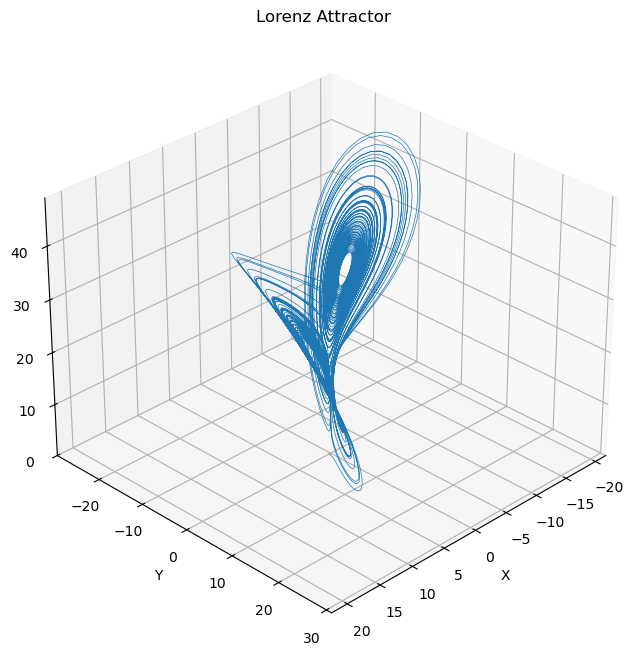

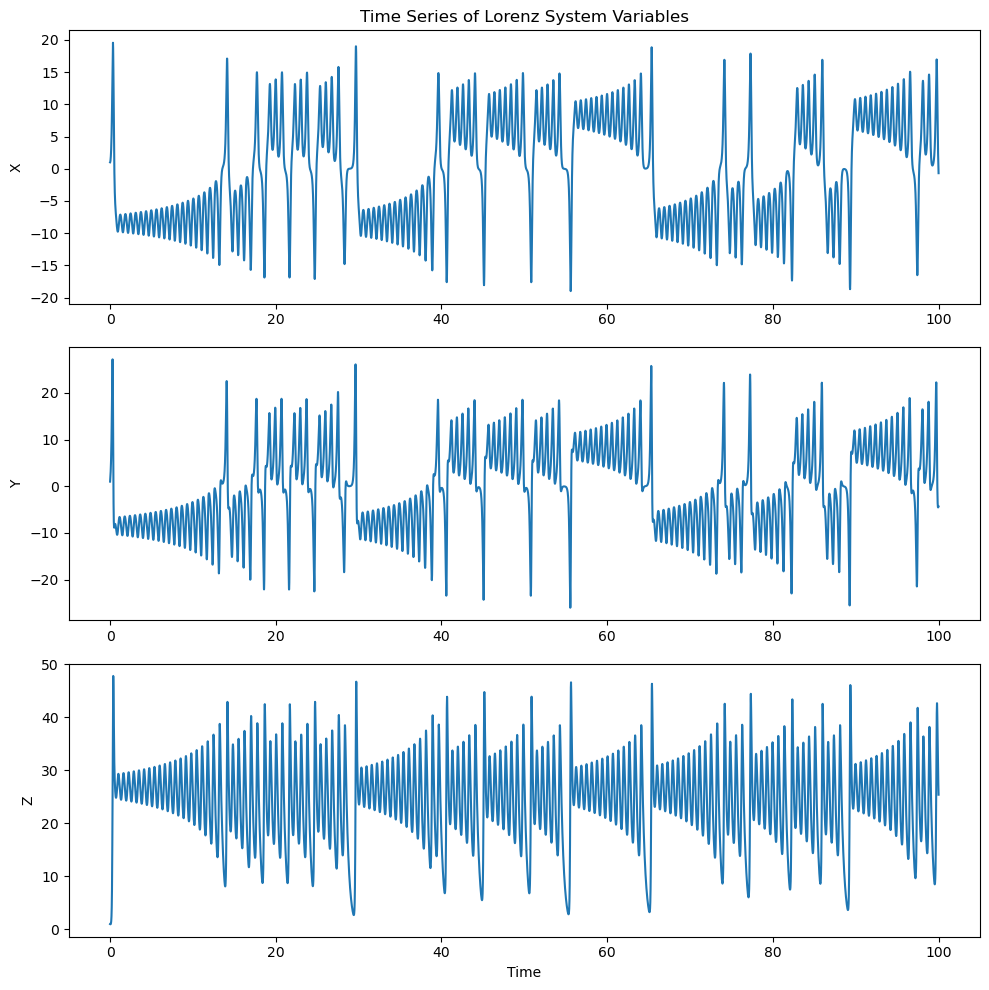

In [4]:

import matplotlib.pyplot as plt

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the solution trajectory
ax.plot(x, y, z, lw=0.5)

# Customize the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor')

# Add some viewing angle adjustments for better visualization
ax.view_init(30, 45)

# Show the plot
plt.show()

# You can also plot the time series of each variable
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 10))

ax1.plot(t, x)
ax1.set_ylabel('X')
ax1.set_title('Time Series of Lorenz System Variables')

ax2.plot(t, y)
ax2.set_ylabel('Y')

ax3.plot(t, z)
ax3.set_xlabel('Time')
ax3.set_ylabel('Z')

plt.tight_layout()
plt.show()

In [5]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create interactive 3D plot
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='lines',
    line=dict(
        width=2,
        color=t,  # Color by time
        colorscale='Viridis',
    ),
    hovertemplate='x: %{x:.2f}<br>y: %{y:.2f}<br>z: %{z:.2f}<extra></extra>'
)])

# Update layout with title and axis labels
fig.update_layout(
    title='Interactive Lorenz Attractor',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z',
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    showlegend=False
)

# Show the 3D plot
fig.show()

# Create interactive time series plots
fig2 = make_subplots(rows=3, cols=1, subplot_titles=('X Variable', 'Y Variable', 'Z Variable'))

# Add traces for each variable
fig2.add_trace(
    go.Scatter(x=t, y=x, mode='lines', name='X'),
    row=1, col=1
)

fig2.add_trace(
    go.Scatter(x=t, y=y, mode='lines', name='Y'),
    row=2, col=1
)

fig2.add_trace(
    go.Scatter(x=t, y=z, mode='lines', name='Z'),
    row=3, col=1
)

# Update layout
fig2.update_layout(
    height=900,
    title_text='Time Series of Lorenz System Variables',
    showlegend=False
)

fig2.update_xaxes(title_text='Time', row=3, col=1)
fig2.update_yaxes(title_text='Value')

# Show the time series plots
fig2.show()

In [6]:
t.shape ,x.shape,y.shape ,z.shape

((10000,), (10000,), (10000,), (10000,))

In [7]:
import pandas as pd
df = pd.DataFrame({"T":t,"X":x,"Y":y,"Z":z})

In [8]:
df.head()


,T,X,Y,Z
0,0.000000,1.000000,1.000000,1.000000
1,0.010001,1.012568,1.259946,0.984890
2,0.020002,1.048831,1.524054,0.973112
3,0.030003,1.107227,1.798399,0.965157
4,0.040004,1.186902,2.088666,0.961737


In [9]:
df.to_csv("Data.csv",index=False)